<a href="https://colab.research.google.com/github/Ashutosh-Singh-Thakur/Bhatra-Intern-Internship/blob/main/Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST Handwritten Digit Classification

#### Import Required Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Loading the Data
#### We will use MNIST data which is in-built in keras api

In [2]:
(X_train, y_train),(X_validation, y_validation) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#### Let's look at the dimentions of our data

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_validation.shape

(10000, 28, 28)

### Some data samples

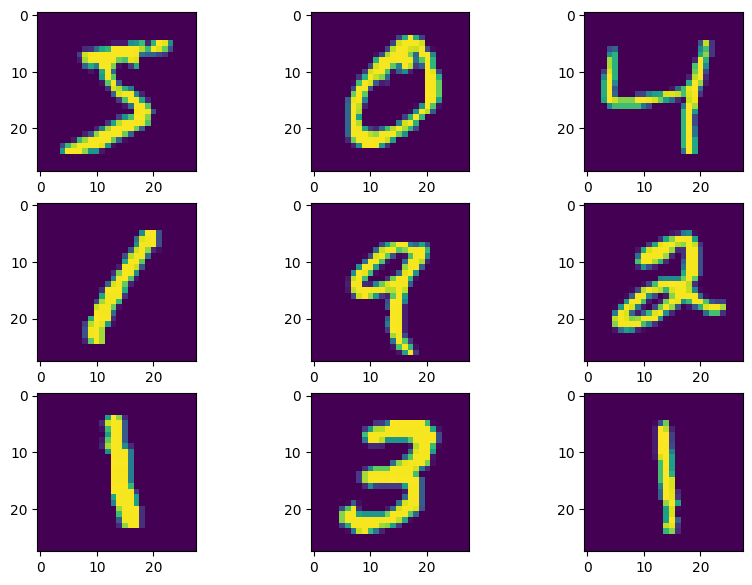

In [5]:
fig = plt.figure(figsize=(10,7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])

### Normalizing the Data

In [6]:
X_train = X_train / 255
X_validation = X_validation / 255

### Deep Nural Network

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(X_train.shape[1],X_train.shape[2],1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    # 64 neuron hidden layer
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    # 10 output neuron, from 0 to 9
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer= 'adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

#### Summary of the Model

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                346144    
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 347114 (1.32 MB)
Trainable params: 347114 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

#### Callback to stop training when accuracy reaches a desired value

In [15]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            # Stop training once the above condition is met
            self.model.stop_training = True
callbacks = myCallback()

### Training our Model

In [16]:
history = model.fit(x = X_train,
                    y = y_train,
                    epochs=15,
                    verbose=1,
                    validation_data= (X_validation, y_validation),
                    callbacks=[callbacks])

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3456 - accuracy: 0.9274 - val_loss: 0.2099 - val_accuracy: 0.9645
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2047 - accuracy: 0.9640 - val_loss: 0.1933 - val_accuracy: 0.9641
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1771 - accuracy: 0.9688 - val_loss: 0.1544 - val_accuracy: 0.9747
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1636 - accuracy: 0.9711 - val_loss: 0.1551 - val_accuracy: 0.9711
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1530 - accuracy: 0.9737 - val_loss: 0.1380 - val_accuracy: 0.9769
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1437 - accuracy: 0.9750 - val_loss: 0.1458 - val_accuracy: 0.9728
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1379 - accuracy: 0.9758 - val_loss: 0.1370 - val_accuracy:

### Retrieve a list of list results on training and validation data

In [17]:
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1) # Get number of epochs

### Visualizing the model Training and Validation Accuracy & Training and Validation Loss

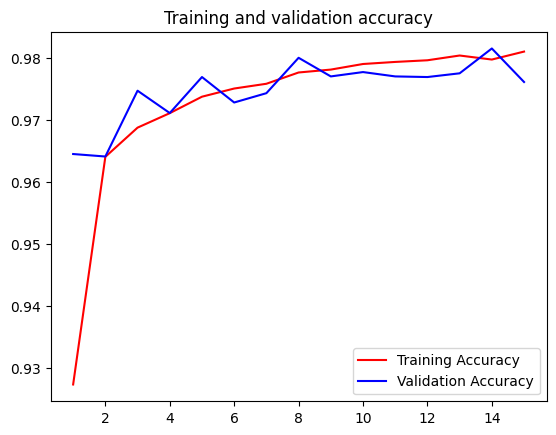

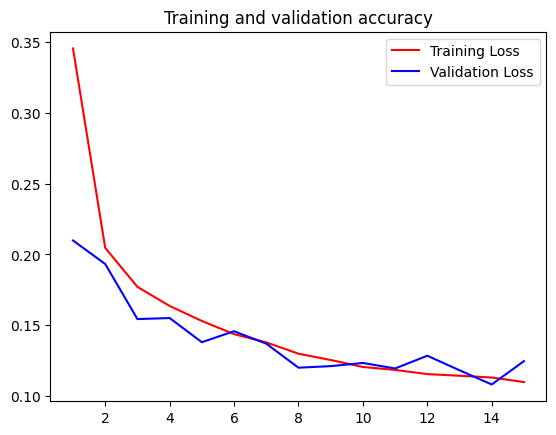

In [18]:
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation accuracy')
plt.legend(["Training Loss","Validation Loss"])
plt.show()

#### Conclusion:
#### With each epoch we observe

*   The accuracy of Training & Validation are following around value of 98%.
*   The training and validation losses are decreasing and following same value of 0.005 and 0.05 respt.

